In [1]:
import numpy as np
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn 
from pandas.api.types import CategoricalDtype
sns.set(style="ticks", color_codes=True)

C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-79V6INH\DANIEL1;"
                      "Database=pharmacy_1;"
                      "Trusted_Connection=yes;")

In [3]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM dbo.pro_1')
full_data=cursor

In [5]:
df = pd.read_sql( 'SELECT * FROM dbo.pro_1',conn)
df.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq  
0  1000084527       20110         1  3.56    60  
1  1999004071       20120         1  0.35    30  
2  1999003192       20120         1  0.51    30  
3  1999001402       20110         1   7.7     8  
4  1999001542       20120         1  0.16    30

In [6]:
df['sku'] = df['sku'].astype(int)

### merge_pharma_1p

In [7]:
import pandas as pd

df1 = pd.read_csv (r'C:\Users\DANIEL\Documents\DataScience\data\pharma_1p.csv')
df1.head()

sku form  q_pac                    pharmaco_3 pharmaco_c
0  1000001081  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
1  1000001082  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
2  1000001083  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
3  1000001618  TAB     30  LIPID MODIFYING AGENTS PLAIN       C10A
4  1000001689  TAB     30  LIPID MODIFYING AGENTS PLAIN       C10A

In [8]:
df1['sku'] = df1['sku'].astype(int)

In [9]:
df2 = df.merge(df1, on='sku', how='left')
df2.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq form  q_pac  \
0  1000084527       20110         1  3.56    60  TAB   60.0   
1  1999004071       20120         1  0.35    30  TAB   30.0   
2  1999003192       20120         1  0.51    30  TAB   30.0   
3  1999001402       20110         1   7.7     8  INJ    5.0   
4  1999001542       20120         1  0.16    30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

In [10]:
df2.shape

(12628378, 15)

In [11]:
df2.dtypes

year            object
yyyy_mm         object
store_code      object
district        object
sku              int32
item_name       object
genery          object
affiliation     object
customers       object
price           object
tranq           object
form            object
q_pac          float64
pharmaco_3      object
pharmaco_c      object
dtype: object

In [12]:
df3=df2
df3=df2.loc[(df2['yyyy_mm'] <= '201906')]
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq form  q_pac  \
0  1000084527       20110         1  3.56    60  TAB   60.0   
1  1999004071       20120         1  0.35    30  TAB   30.0   
2  1999003192       20120         1  0.51    30  TAB   30.0   
3  1999001402       20110         1   7.7     8  INJ    5.0   
4  1999001542       20120         1  0.16    30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

In [13]:
df3.shape

(10527735, 15)

# droping [\"\',] from values & updating data types

In [14]:
df3['tranq'] = df3['tranq'].str.replace(r"[\"\',]", '')

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df3['price'] = df3['price'].str.replace(r"[\"\',]", '')

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df3['tranq'] = df3['tranq'].astype(float)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df3['tranq'] = df3['tranq'].astype(int)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df3['price'] = df3['price'].astype(float)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df3['customers'] = df3['customers'].astype(int)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df3.dtypes

year            object
yyyy_mm         object
store_code      object
district        object
sku              int32
item_name       object
genery          object
affiliation     object
customers        int32
price          float64
tranq            int32
form            object
q_pac          float64
pharmaco_3      object
pharmaco_c      object
dtype: object

In [21]:
dfpy = df3[['customers', 'price','tranq']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E03EF9470>,
      dtype=object)

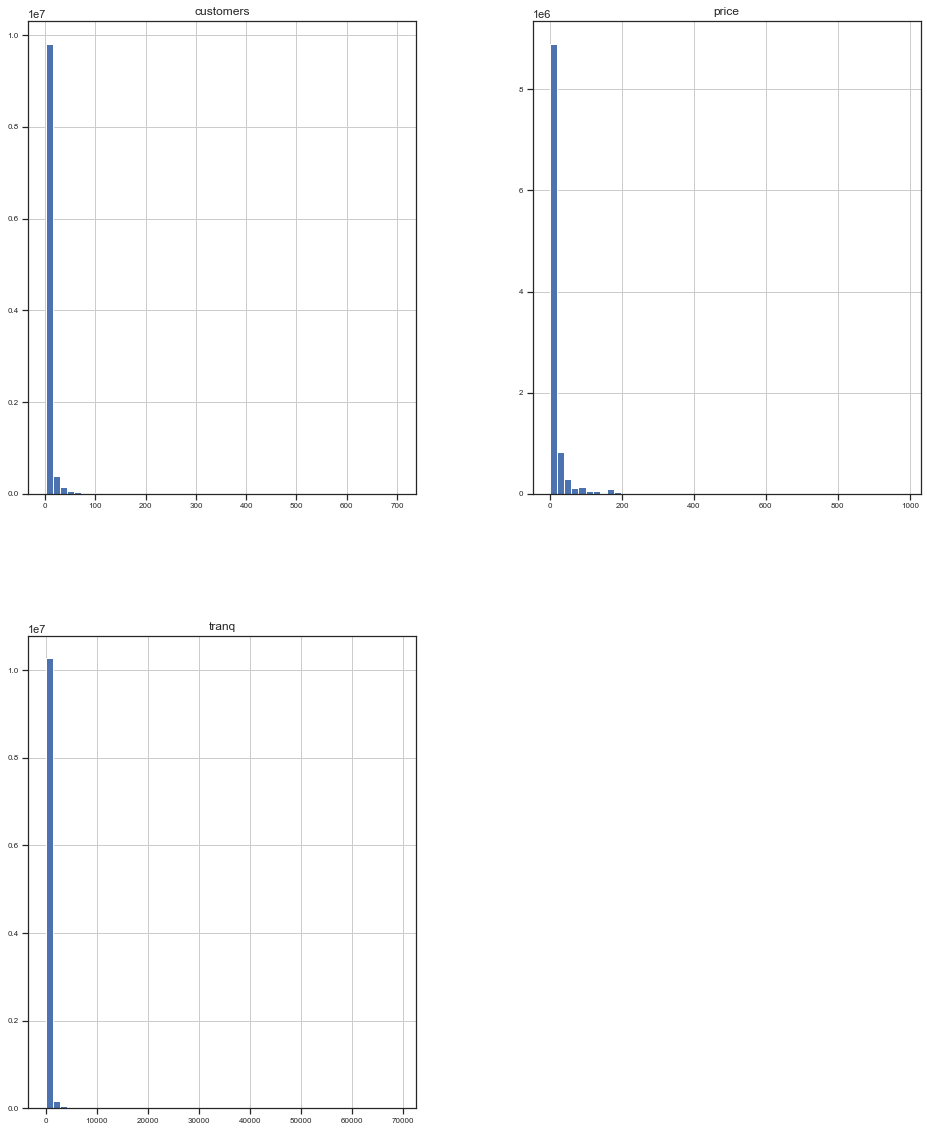

In [22]:
dfpy.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

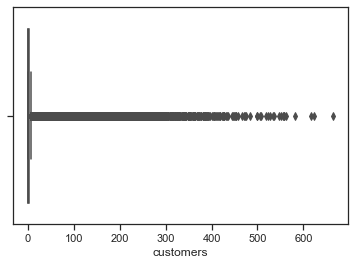

In [23]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['customers'])

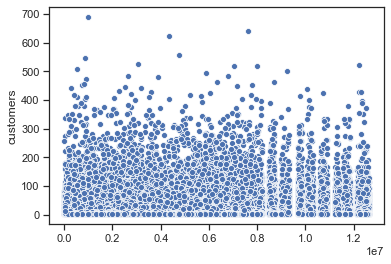

In [24]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['customers'])

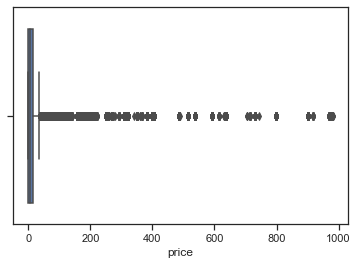

In [25]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['price'])

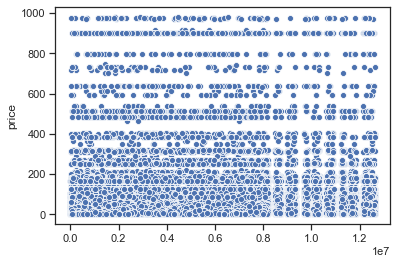

In [26]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['price'])

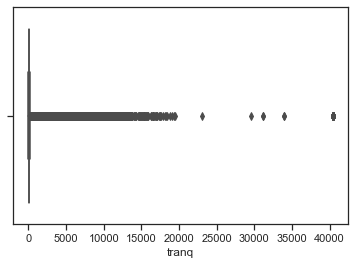

In [27]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['tranq'])

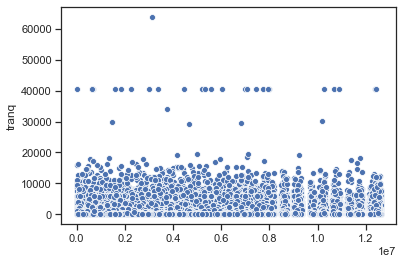

In [28]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['tranq'])

In [29]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [18]:
#dfeda = df1[['customers','price','tranq']]

In [40]:
#from pyMechkar import exploreData
#exploreData(dfeda.sample(n = 1000000), y="tranq")

# EDA

In [30]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df3.sample(n = 1000000))
prof.to_file(output_file='output.html')
prof.to_notebook_iframe()

In [18]:
df1.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation  customers  price  tranq  
0  1000084527       20110          1   3.56     60  
1  1999004071       20120          1   0.35     30  
2  1999003192       20120          1   0.51     30  
3  1999001402       20110          1   7.70      8  
4  1999001542       20120          1   0.16     30

# binary encoding

## affiliation

In [38]:
s = df1['affiliation'].value_counts(normalize=True) * 100 
df1['affiliation_Binary'] = df1['affiliation'].map(s)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df1[['affiliation_Binary', 'affiliation']].head()

affiliation_Binary affiliation
0           20.486952       20110
1           76.558215       20120
2           76.558215       20120
3           20.486952       20110
4           76.558215       20120

## district

In [40]:
s = df1['district'].value_counts(normalize=True) * 100 
df1['district_Binary'] = df1['district'].map(s)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
df1.sample(n = 100)[['district_Binary', 'district']].head()

district_Binary district
10174102        12.842800      777
6442850         14.894609     1277
3755078         13.209299      477
11596159        13.326618     1577
187223          11.412844      977

## store_code

In [42]:
s = df1['store_code'].value_counts(normalize=True) * 100 
df1['store_code_Binary'] = df1['store_code'].map(s)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
df1.sample(n = 100)[['store_code_Binary', 'store_code']].head()

store_code_Binary store_code
1758882            0.119171       5117
10759194           0.350617       2014
434049             0.094009       5266
5830265            0.180884       4219
3825192            0.178291       4987

# log x+1

## ['customers', 'price','tranq']

In [44]:
to_log = ['customers', 'price','tranq']

In [45]:
df1[to_log] = df1[to_log].applymap(lambda x: np.log(x+1)) # add columns log to dataframe

C:\Users\DANIEL\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# one hot encoding

# year

In [46]:
# Get one hot encoding of columns a
one_hot = pd.get_dummies(df1['year'])
df1 = df1.join(one_hot) 

In [47]:
with pd.option_context('display.precision', 2):
           df1[['affiliation_Binary','district_Binary']]

In [48]:
df1.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation  customers     price     tranq  affiliation_Binary  \
0  1000084527       20110   0.693147  1.517323  4.110874           20.486952   
1  1999004071       20120   0.693147  0.300105  3.433987           76.558215   
2  1999003192       20120   0.693147  0.412110  3.433987           76.558215   
3  1999001402       20110   0.693147  2.163323  2.197225           20.486952   
4  1999001542       20120   0.693147  0.148420  3.433987           76.558215   

   district_Binary  store_code_Binary  2017  2018  2019  
0        13.209299           0.183249     1     0     0  
1        13.209299           0.183249     1     0     0  
2        13.209299           0.183249     1     0     0  
3        13.209299           0.183249     1     0     0  
4        13.209299           0.183249     1     0     0

# Outlier Detection

### Graphical methods

#### customers

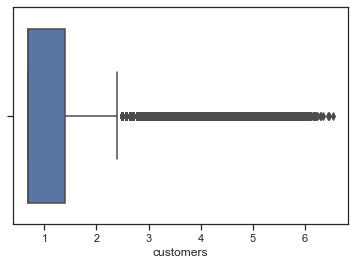

In [49]:
## Using box (Wiskers) plot
outl = sns.boxplot(df1.sample(n = 1000000)['customers'])

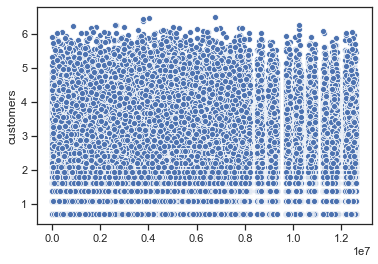

In [50]:
###  using scatterplots
sns.scatterplot(x=df1.sample(n = 1000000).index,y=df1.sample(n = 1000000)['customers'])

### price

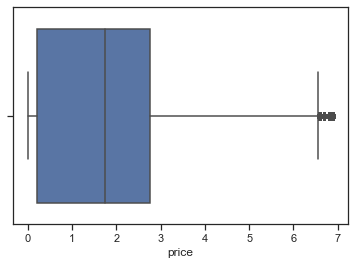

In [51]:
## Using box (Wiskers) plot
outl = sns.boxplot(df1.sample(n = 1000000)['price'])

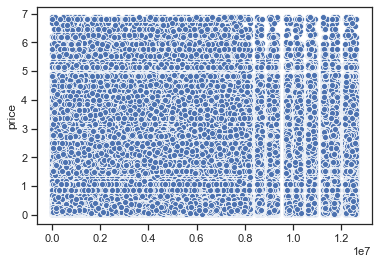

In [52]:
sns.scatterplot(x=df1.sample(n = 1000000).index,y=df1.sample(n = 1000000)['price'])

### tranq

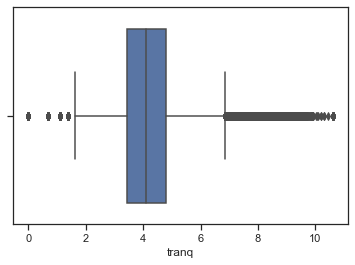

In [53]:
## Using box (Wiskers) plot
outl = sns.boxplot(df1.sample(n = 1000000)['tranq'])

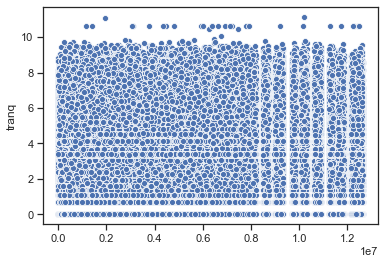

In [54]:
sns.scatterplot(x=df1.sample(n = 1000000).index,y=df1.sample(n = 1000000)['tranq'])

# Missing Values

In [56]:
print(df3.isnull().sum())

year               0
yyyy_mm            0
store_code         0
district           0
sku                0
item_name          0
genery             0
affiliation        0
customers          0
price              0
tranq              0
form           42009
q_pac          42009
pharmaco_3     42009
pharmaco_c     42009
dtype: int64


## cheking target value after imputaion

In [59]:
dfpy = df1[['tranq']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002185B14C278>]],
      dtype=object)

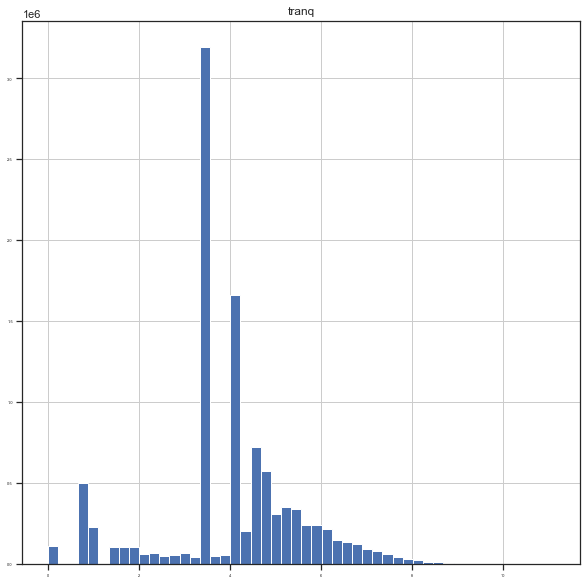

In [62]:
dfpy.hist(figsize=(10, 10), bins=50, xlabelsize=4, ylabelsize=4)

# Feature Selection